In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data1 = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data1.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [14]:
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1       100 non-null float64
exam2       100 non-null float64
admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [0]:
X = np.array(data1[['exam1', 'exam2']])
y = np.array(data1['admitted'])
X = np.insert(X, 0, 1, axis=1)

In [0]:
def plot_dataset(X, y, axes):
  plt.figure(figsize=(10,6))
  plt.plot(X[:, 1][y==1], X[:, 2][y==1], "k^", label="Admitted")
  plt.plot(X[:, 1][y==0], X[:, 2][y==0], "yo", label="Not admitted")
  plt.axis(axes)
  plt.xlabel("Exam 1 score")
  plt.ylabel("Exam 2 score")
  plt.grid(True)
  plt.legend()

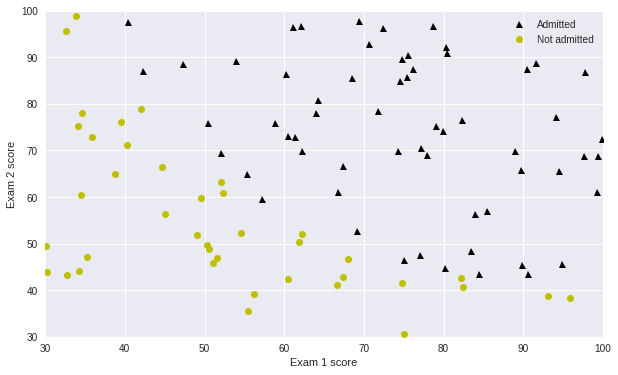

In [17]:
plot_dataset(X, y, [30, 100 ,30, 100])

In [0]:
from scipy.special import expit

In [19]:
print(expit(0))
print(expit(1))
print(expit(-1))

0.5
0.7310585786300049
0.2689414213699951


In [0]:
def h(theta, x):
  return expit(np.dot(x, theta))

In [0]:
def j(theta, x, y, lambda_=0):
  term1 = np.dot(-y.T, np.log(h(theta, x)))
  term2 = np.dot((1 - y).T, np.log(1 - h(theta, x)))
  regul_term = (lambda_ / 2) * np.sum(np.dot(theta[1:].T, theta[1:]))
  return float((1. / m) * (np.sum(term1 - term2) + regul_term))

In [0]:
y = y.reshape(y.size, 1)
m = y.size

In [23]:
initial_theta = np.zeros((X.shape[1], 1))
j(initial_theta, X, y)

0.6931471805599453

In [0]:
from scipy import optimize

def optimizeTheta(theta, x, y, lambda_=0):
  result = optimize.fmin(j, x0=theta, args=(x, y, lambda_), maxiter=400, full_output=True)
  return result[0], result[1]

In [25]:
optimized_theta, mincost = optimizeTheta(initial_theta, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [26]:
optimized_theta

array([-25.16130062,   0.20623142,   0.20147143])

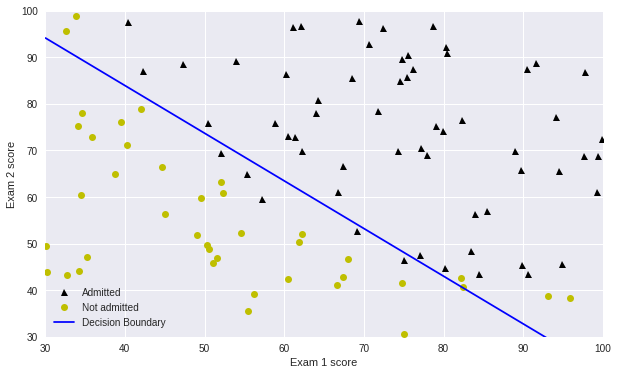

In [27]:
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./optimized_theta[2])*(optimized_theta[0] + optimized_theta[1] * boundary_xs)
plot_dataset(X, np.array(data1['admitted']), [30, 100 ,30, 100])
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(data1[['exam1', 'exam2']], np.array(data1['admitted']))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
print(log_reg.intercept_, log_reg.coef_)

[-3.89977794] [[0.03844482 0.03101855]]


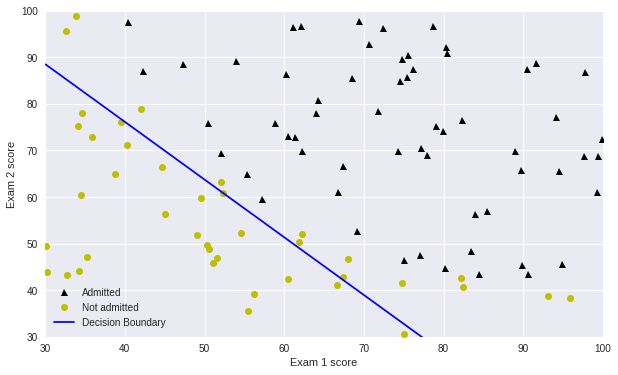

In [30]:
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./log_reg.coef_[0][1])*(log_reg.intercept_[0] + log_reg.coef_[0][0] * boundary_xs)
plot_dataset(X, np.array(data1['admitted']), [30, 100 ,30, 100])
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [31]:
data2 = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [32]:
data2.info()
data2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
accepted    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


,test1,test2,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [0]:
X = np.array(data2[['test1', 'test2']])
y = np.array(data2['accepted'])
X = np.insert(X, 0, 1, axis=1)

In [0]:
def plot_dataset(X, y, axes):
  plt.figure(figsize=(10,6))
  plt.plot(X[:, 1][y==1], X[:, 2][y==1], "k^", label="accpeted")
  plt.plot(X[:, 1][y==0], X[:, 2][y==0], "yo", label="rejected")
  plt.axis(axes)
  plt.xlabel("test 1")
  plt.ylabel("test 2")
  plt.grid(True)
  plt.legend()

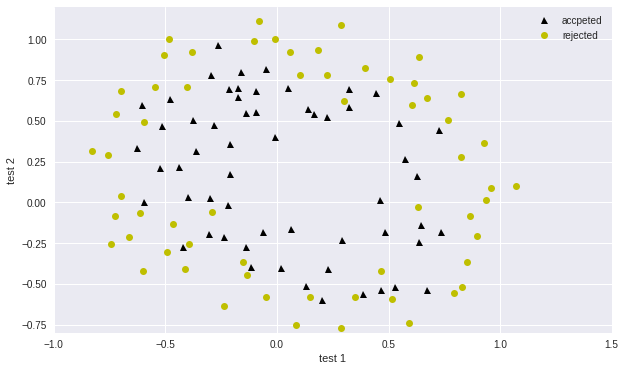

In [50]:
plot_dataset(X, np.array(data2['accepted']), [-1, 1.5, -0.8, 1.2])

In [0]:
def mapFeature(x1, x2):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones((x1.shape[0], 1))

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1 ** (i-j)
            term2 = x2 ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [0]:
mappedX = mapFeature(X[:,1],X[:,2])

In [0]:
y = y.reshape(y.size, 1)
m = y.size

In [41]:
initial_theta = np.zeros((mappedX.shape[1],1))
j(initial_theta,mappedX,y)

0.6931471805599454

In [44]:
def optimizeRegularizedTheta(theta, X, y, lambda_=0.):
    result = optimize.minimize(j, theta, args=(X, y, lambda_),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta, mappedX, y)

print(theta, mincost)

[[   19.48895202    31.77071668    15.81856621  -190.32549752
    -83.29113384   -98.64641249  -233.37013986  -192.73250352
   -125.68678955   -39.10022931   653.81901509   497.24509303
    808.05191392   331.61050851   178.7450436    397.50431401
    515.11975572   612.32569907   354.6859969    127.31675721
     34.0607572   -764.90841504  -890.34186772 -1493.76452377
  -1027.76691682 -1008.49110118  -376.10753415  -121.08161146]] 0.24867318921330264


In [0]:
def plotBoundary(theta, X, y, lambda_=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(theta, X, y, lambda_)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%lambda_}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

<Figure size 864x720 with 0 Axes>

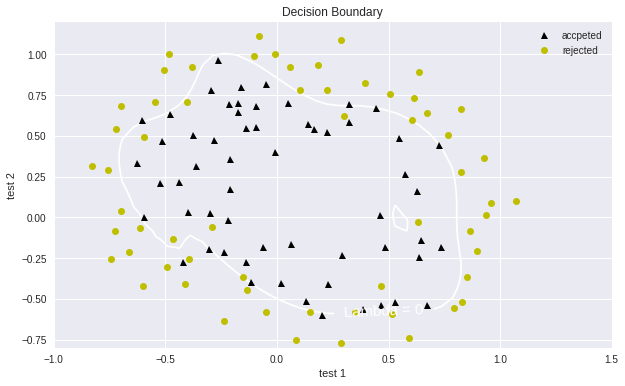

In [57]:
plt.figure(figsize=(12,10))
plot_dataset(X, np.array(data2['accepted']), [-1, 1.5, -0.8, 1.2])
plotBoundary(theta,mappedX, np.array(data2['accepted']),0.)


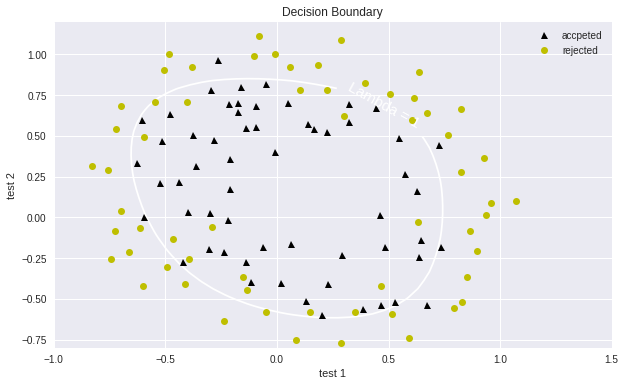

In [58]:
plot_dataset(X, np.array(data2['accepted']), [-1, 1.5, -0.8, 1.2])
plotBoundary(theta,mappedX, np.array(data2['accepted']),1.)

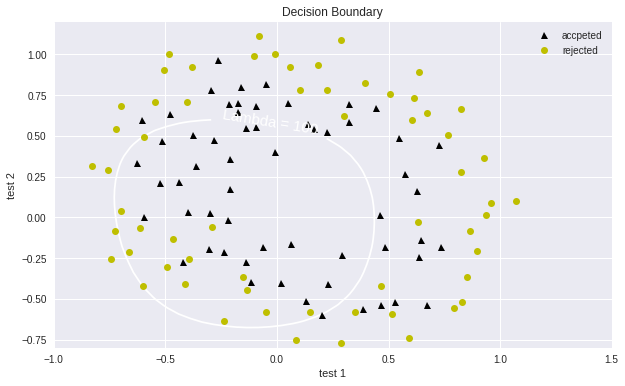

In [59]:
plot_dataset(X, np.array(data2['accepted']), [-1, 1.5, -0.8, 1.2])
plotBoundary(theta,mappedX,np.array(data2['accepted']),100.)